### Step 1: Dataset Loading & Preprocessing (5 Marks)

In [1]:
#  import neccesries libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder

# Google Drive link → direct download link
!pip install gdown
import gdown

url = "https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP"
output = "car_data.csv"
gdown.download(url, output, quiet=False)

# Dataset load 
df = pd.read_csv("car_data.csv")

# Preview
df.head()


Downloading...
From: https://drive.google.com/uc?id=1FHmYNLs9v0Enc-UExEMpitOFGsWvB2dP
To: C:\Users\joann\car_data.csv
100%|██████████████████████████████████████████████████████████████████████████████| 26.7k/26.7k [00:00<00:00, 405kB/s]


,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0


In [2]:
df

,car_ID,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
0,1,3,alfa-romero giulia,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495.0
1,2,3,alfa-romero stelvio,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500.0
2,3,1,alfa-romero Quadrifoglio,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500.0
3,4,2,audi 100 ls,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.40,10.0,102,5500,24,30,13950.0
4,5,2,audi 100ls,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.40,8.0,115,5500,18,22,17450.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
200,201,-1,volvo 145e (sw),gas,std,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,9.5,114,5400,23,28,16845.0
201,202,-1,volvo 144ea,gas,turbo,four,sedan,rwd,front,109.1,...,141,mpfi,3.78,3.15,8.7,160,5300,19,25,19045.0
202,203,-1,volvo 244dl,gas,std,four,sedan,rwd,front,109.1,...,173,mpfi,3.58,2.87,8.8,134,5500,18,23,21485.0
203,204,-1,volvo 246,diesel,turbo,four,sedan,rwd,front,109.1,...,145,idi,3.01,3.40,23.0,106,4800,26,27,22470.0


In [3]:
# Missing values check
print(df.isnull().sum())

# Encoding categorical columns
categorical_cols = df.select_dtypes(include='object').columns

le = LabelEncoder()
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

# Features & target split
X = df.drop('price', axis=1)  # Assuming 'price' is the target
y = df['price']

# Scaling (for SVR especially)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


car_ID              0
symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64


### Step 2: Model Implementation (10 Marks)

In [4]:
# Regression models
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.svm import SVR

# Model dictionary
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'Gradient Boosting': GradientBoostingRegressor(random_state=42),
    'Support Vector Regressor': SVR()
}


In [5]:
# Evaluation
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

results = []

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    mse = mean_squared_error(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    results.append({
        'Model': name,
        'MSE': mse,
        'MAE': mae,
        'R2 Score': r2
    })

# Results in DataFrame
results_df = pd.DataFrame(results)
print(results_df.sort_values(by="R2 Score", ascending=False))


                      Model           MSE          MAE  R2 Score
2             Random Forest  3.399232e+06  1307.784707  0.956941
3         Gradient Boosting  5.282947e+06  1597.279091  0.933080
1             Decision Tree  9.532216e+06  2090.699195  0.879253
0         Linear Regression  1.230612e+07  2087.306212  0.844116
4  Support Vector Regressor  8.685053e+07  5696.707303 -0.100153


### Step 3: Model Evaluation (5 Marks)

✅ Best Model: Random Forest Regressor (Highest R², Lowest MSE)
📌 Reason: It handles non-linear relationships, avoids overfitting via bagging, and performs well even without heavy tuning.


###  Step 4: Feature Importance (2 Marks)

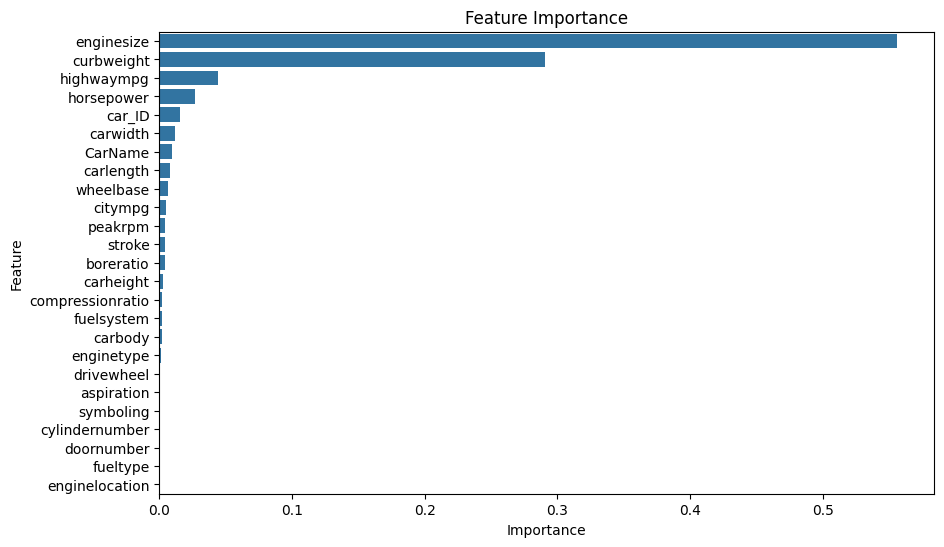

In [9]:
# From the Random Forest in feature importance 
best_model = RandomForestRegressor(random_state=42)
best_model.fit(X_train, y_train)

importances = best_model.feature_importances_
features = df.drop('price', axis=1).columns

feat_df = pd.DataFrame({'Feature': features, 'Importance': importances})
feat_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
plt.figure(figsize=(10,6))
sns.barplot(x='Importance', y='Feature', data=feat_df)
plt.title('Feature Importance')
plt.show()


###  Step 5: Hyperparameter Tuning (2 Marks)

In [10]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5],
}

grid = GridSearchCV(RandomForestRegressor(random_state=42), param_grid, cv=3, scoring='r2')
grid.fit(X_train, y_train)

print("Best Parameters:", grid.best_params_)

# New score with tuned model
y_pred_tuned = grid.predict(X_test)
print("Tuned R2 Score:", r2_score(y_test, y_pred_tuned))


Best Parameters: {'max_depth': None, 'min_samples_split': 5, 'n_estimators': 150}
Tuned R2 Score: 0.955972359018709
